<a href="https://colab.research.google.com/github/mabittar/Portfolio/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados sobre a Violência no Rio de Janeiro

Como parte da provocação feita no curso de **Data Science na Prática** fui desafiado explorar os dados disponível no site do Governo do Rio de Janeiro sobre a violência no estado.
[fonte](http://www.ispvisualizacao.rj.gov.br/index.html)

Além de importar um base de dados diretamente para o Colab. Vamos verificar estrutura dos dados disponíveis e extrair hióteses a partir desses dados, iremos utilizar ferramentas exploratórias como resumos estatísticos e histogramas.





##Aplicações e utilização de Data Science na Prática
Inúmeras histórias de sucesso na aplicação de Inteligência Artificial na internet são conhecidas.

Empresas como Walmart utilizam Data Science para estruturar o gerenciamento de surpimentos, otimizar rotas de entregas e empacotamento para envio. Um dos casos de maior sucesso na internet é o Netflix que utiliza ferramentas similares para fazer recomendações personalizadas a partir de conteúdos anteriores assistidos.

A segurança pública deve ganhar um novo capítulo a partir da utilização de ferramentas similares, pois com esses recursos o policiamento pode-se tornar mais eficiente. Câmeras com inteligência artificial são capazes de identificar pessoas analisando detalhes de rostos, como distância entre os olhos, formato de boca, queixo e nariz, bem como a linha da mandíbula. 

---
Quer saber mais sobre o **curso**? Basta seguir o link:
<center>
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">


## **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*
</center>

---

# Analisando a Violência no Rio de Janeiro

A história de violência nas comunidades do Rio de Janeiro começou a ganhar as manchetes a partir da guerra para controle das bocas de fumo no Morro da Providência, manchetes dos anos 1971 e 1972 tomaram conta dos jornais há epóca.

Não existia Comando Vermelho, que nasceria no fim daquela década no presídio de Ilha Grande, e tampouco o Bope, formado dez anos mais tarde, em 1982, com o nome de Companhia de Operações Especiais da Polícia Militar. Mas “paz” já era uma palavra estrangeira na Providência, palco da primeira guerra entre traficantes da cidade, poucos anos antes do conflito mais conhecido e sanguinário, entre as quatro quadrilhas que dominavam a Cidade de Deus, incluindo as de Zé Pequeno e Mané Galinha – história levada ao cinema e que expôs o fracasso da política habitacional vigente, focada em despejar favelados em áreas distantes do Centro e da Zona Sul.

Com a chegada da corte portuguesa a população do Rio de Janeiro saltou de 60 mil habitantes para mais de 120.000 pessoas em poucos anos. Desde essa época o histórico de violência na Capital ganhou dados surpeendentes.

Deixo aqui o link para uma matéria completa abordando o histórico dessa violência.

 [O Globo](https://oglobo.globo.com/rio/as-raizes-da-violencia-no-rio-21804502)

## Importando a Base de dados
* A base dados completa pode ser obtida diretamente no site oficial do governo:
 * http://www.ispdados.rj.gov.br/estatistica.html

* Um *dashboard* interativo e visual pode ser encontrado no site abaixo:
    * http://www.ispvisualizacao.rj.gov.br/index.html

In [ ]:
#bibliotecas importantes
import pandas as pd

from pandas_profiling import ProfileReport
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


In [ ]:
#importando a base de dados
link = 'https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv'

df = pd.read_csv(link)

df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


## Atributos do banco de dados
Nas próximas etapas iremos explorar com auxílio das  ferramentas do Pandas os atributos do banco de dados.

### Dimensões do Banco de Dados


### Quantidade de entradas e variáveis:

In [ ]:
df.shape

(344, 56)

O banco de dados importado possui 344 entradas (linhas) e 56 variáveis (colunas).

### Dicionário de variáveis
Iremos criar um dicionário a fim de facilitar o entendimento de cada variável (colunas).

In [ ]:
#vamos gerar um dicionário com as variáveis (colunas para facilitar o entendimento do banco de dados)
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

* **vano** - ano da ocorrência

* **mes** - mês da ocorrência

* tipos de ocorrência:

  * **hom_doloso** - homicídio doloso

  * **lesao_corp_morte** - lesão corporal com morte

  * **latrocinio** - latrocínio...

  * **roubo_celular** -  roubo celular...

  * **pol_militares_mortos_serv** - policial militar morto em serviço

  * **pol_civis_mortos_serv** - policial civil morto em serviço

*indicadores:

 * **indicador_letalidade** - letalidade

 * **indicador_roubo_rua** - roubo de rua

 * **indicador_roubo_veic** - roubo de veículo

* **registro_ocorrencias** - registro de ocorrência

* **fase** - fase

### Tipo de Variáveis

In [ ]:
df.dtypes


vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

### Identificando valores ausentes

In [ ]:
(df.isnull().sum()).sort_values(ascending=False)

roubo_bicicleta               276
furto_bicicleta               276
apreensao_drogas_sem_autor    180
posse_drogas                  180
apf                           180
aaapai                        180
cmp                           180
trafico_drogas                180
cmba                          180
sequestro_relampago           144
furto_coletivo                144
extorsao                      144
furto_celular                 144
roubo_apos_saque              144
roubo_conducao_saque          144
roubo_cx_eletronico           144
estupro                       144
estelionato                   144
pol_civis_mortos_serv         144
pol_militares_mortos_serv     144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
lesao_corp_culposa             96
ameaca                         96
sequestro                      96
lesao_corp_morte               96
registro_ocorrencias           96
hom_por_interv_policial        84
hom_culposo   

In [ ]:
#Para facilitar vamos verificar a porcentagem dos valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

In [ ]:
#dados ausentes por ano
df1 = df.set_index('vano').isna().sum(level=0)
df1

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,0.0,0.0,12.0,0.0,12.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1992,0.0,0.0,12.0,0.0,12.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1993,0.0,0.0,12.0,0.0,12.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1994,0.0,0.0,12.0,0.0,12.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1995,0.0,0.0,12.0,0.0,12.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1996,0.0,0.0,12.0,0.0,12.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1997,0.0,0.0,12.0,0.0,12.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1998,0.0,0.0,12.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,0.0,12.0,12.0,12.0,12.0,0.0,12.0,0.0,12.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0


##Informações Estatísticas
As primeiras linhas do passo anteior nos mostram que grande parte dos dados estão ausentes, vamos verificar a distribuição dos dados para termos uma visualização melhor

In [ ]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

## Comparando variáveis

Adiante iremos verificar alguns dados e hipóteses a partir das viaráveis

### Quantos % roubos de carga representam em relação ao total de roubos?

In [ ]:
carga = df.roubo_carga.sum() / df.total_roubos.sum()

print("A porcentagem de roubos de carga em relação a roubos é: {:.2%}." .format(carga))

A porcentagem de roubos de carga em relação a roubos é: 3.61%.


###Quantos % de casos de carros roubados ou furtados são encontrados após a ocorrência?

In [ ]:
recuperados = df.recuperacao_veiculos.sum() / (df.roubo_veiculo.sum() + df.furto_veiculos.sum() )

print("A porcentagem de carros recuperados é: {:.2%}." .format(recuperados))

A porcentagem de carros recuperados é: 42.98%.


##Vizualização dos dados

As técnicas e possibilidades para visualização são inúmeras e dependentes de cada problema e do *dataset*. O objetivo desta etapa é mostrar algumas técnicas mais comuns aplicadas aos projetos de *Data Science*.

###Ocorrências de policiais militares mortes em serviço

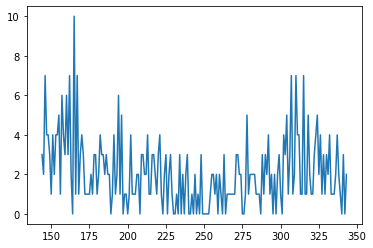

In [ ]:
df['pol_militares_mortos_serv'].plot();

###Homicídios dolosos

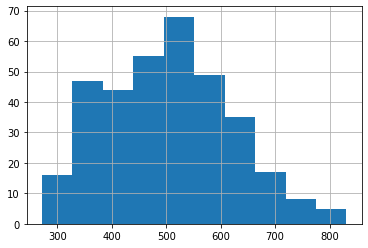

In [ ]:
df['hom_doloso'].hist();

###Homicídios dolosos por ano
O gráfico anteior não nos fornece muitas informações sobre a evolução desse dados. Entretando podemos agrupá-lo por ano e traçar um gráfico de linha para visualizar a evolução.

In [ ]:
# criar um novo dataset para tratarmos apenas o ano e número de ocorrências
df_hom = df.filter(['vano','hom_doloso'], axis=1)

# agrupar por ano, somando as ocorrências
df_hom = df_hom.groupby(['vano'])['hom_doloso'].sum()

# o comando a seguir nos apresenta dos dados de forma aleatória.
df_hom.sample(n=5)

vano
2019    2717
2001    6163
1998    5726
2016    5042
2005    6620
Name: hom_doloso, dtype: int64

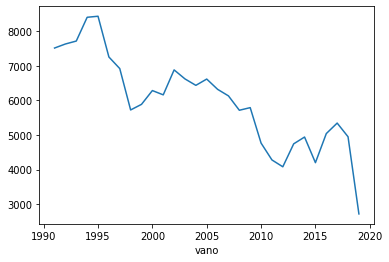

In [ ]:
# vamos traçar o gráfico de linha com a informação tratada.
df_hom.plot( x='vano', y='hom_doloso');

Com os dados tratados fica fácil visualizar a regressão no número de homicídios dolosos por ano.

###Total de furtos por ano
Após o tratamento dos dados no caso anteior, vamos fazer o mesmo para o total de furtos.

In [ ]:
# criar um novo dataset para tratarmos apenas o ano e número de ocorrências
df_furto = df.filter(['vano','total_furtos'], axis=1)

# agrupar por ano, somando as ocorrências
df_furto = df_furto.groupby(['vano'])['total_furtos'].sum()

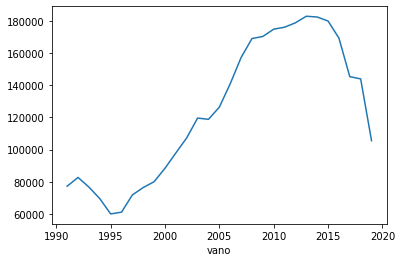

In [ ]:
# vamos traçar o gráfico de linha com a informação tratada.
df_furto.plot( x='vano', y='total_furtos');

###Total de furtos por ano e tráfico de drogas
Utilizando os dados tratados do gráfico de furtos por ano, iremos tratar os dados para ocorrências de tráfico de drogas, unir os dois e plotá-los num único gráfico.

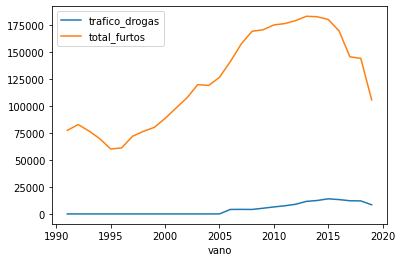

In [ ]:
# criar um novo dataset para tratarmos apenas o ano e número de ocorrências
df_drogas = df.filter(['vano','trafico_drogas'], axis=1)

# agrupar por ano, somando as ocorrências
df_drogas = df_drogas.groupby(['vano'])['trafico_drogas'].sum()

#juntar os dois DF
df_duas = pd.merge(df_drogas, df_furto, how='inner', on='vano')
df_duas.plot.line();

ou ainda podemos plotá-los em gráficos separados:

numpy.ndarray

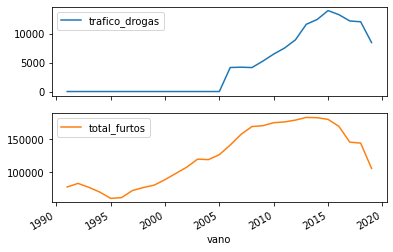

In [ ]:
graficos = df_duas.plot.line(subplots=True)
type(graficos)

## Tratando os Dados

No caso desse conjunto de dados específico, o ideal é analisar os dados apenas do período em que se tem dados. Especialmente em algumas variáveis onde o volume é muito grande, qualquer tipo de preenchimento poderia enviesar os dados de forma que a análise deixasse de ser relevante.

Para outros casos, podemos considerar as seguintes hipóteses:

* Excluir
  * Se os dados ausentes estão em pequeno número,ocorrem aleatoriamente, e a ausência não carrega significado, é melhor excluir a linha. No caso da coluna, se ainda for possível analisar alguma parte dela, use-a, como é o caso aqui. Mas para algumas situações, o ideal é excluir a coluna.

* Preencher
  * Preencher as entradas com dados ausentes com valores estatísticos como a média, mediana, moda ou zeros.
  * A média é mais útil quando a distribuição dos dados é normal. Em dados com distribuição mais enviesada (*skewed*), a mediana é uma solução mais robusta, pois ela é menos sensível a outliers.
  * Uma `Regressão Linear` também pode ser útil, apesar de sensível a outliers, podem nos ajudar a inserir valores que nos ajudem.
  * Indetificar a entrada ausente com algum valor que indique isso pode ser mais informativo, quando a ausência representa valor. Por exemplo, em dados numéricos preencher com zero, e em categóricos criar uma categoria "Desconhecido". Atenção, pois os zeros não podem ser levados em consideração em análises estatísticas.

## Tratando Outliers

<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>


*Outliers* são pontos discrepantes, que estão destoando do padrão do conjunto de dados.

É muito importante conseguir identificar e tratar esses outliers, pois eles podem nos mostrar uma imagem incorreta dos nossos dados.

Podemos identificar um outlier de diversas formas, entre elas podemos citar:

* IQR Score
* Boxplots
* Scatter plots
* Z-Score

Nos próximos projetos vamos ver na prática o processo completo de limpeza de dados, tratando dados ausentes, convertendo os dados para o formato correto, e tratando dos outliers.

## Conclusão
A base de dados é extensa e nos permite diversas conclusões, entretanto precisamos estruturar os dados antes de podermos avaliar qualquer hipótese.

Podemos perceber no último estudo realizado, pois gerar apenas o histograma de casos de homicídios não nos trouxe nenhuma informação, porém após agrupá-lo por ano pode-se verificar uma queda significativa nos casos de homicídios dolosos desde o início de acompanhamento da série.

Mais uma vez ressalto a importância de extrapolar os dados fornecidos, pois esse é apenas o passo incial de qualquer análise.